<a href="https://colab.research.google.com/github/ab0473a/Machine-Learning-/blob/main/EVI_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import shutil 

In [2]:
import os
base_dir = '/content/drive/MyDrive/Colab Notebooks/Emergency_Vehicle_Images'

EMS_dir = os.path.join(base_dir, 'EMS')
fire_dir = os.path.join(base_dir, 'Fire')
pd_dir = os.path.join(base_dir, 'Police')

print('total training EMS images:', len(os.listdir(EMS_dir)))
print('total training Fire images:', len(os.listdir(fire_dir)))
print('total training Police images:', len(os.listdir(pd_dir)))

EMS_files = os.listdir(EMS_dir)
print(EMS_files[:10])
fire_files = os.listdir(fire_dir)
pd_files = os.listdir(pd_dir)


total training EMS images: 96
total training Fire images: 98
total training Police images: 96
['Wake County EMS.jpeg', '190613_EMS_738x330.jpeg', 'medtrust.jpeg', 'white blue amb.jpeg', 'madison ems .jpeg', 'm40.jpeg', 'Hawaii ems .jpeg', 'Manatee county ems.jpeg', 'FDNY EMS.jpeg', 'honolulu ems .jpeg']


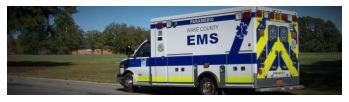

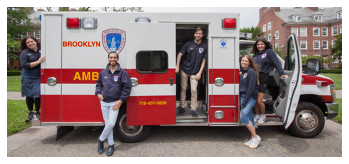

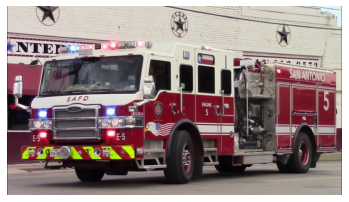

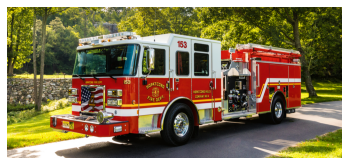

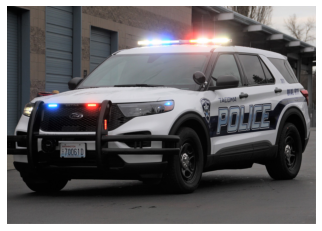

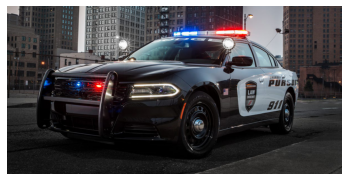

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_amb = [os.path.join(EMS_dir, fname) 
                for fname in EMS_files[pic_index-2:pic_index]]
next_fire = [os.path.join(fire_dir, fname) 
                for fname in fire_files[pic_index-2:pic_index]]
next_pd = [os.path.join(pd_dir, fname) 
                for fname in pd_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_amb+next_fire+next_pd):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [4]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
dir = os.listdir('/content/drive/MyDrive/Colab Notebooks/Emergency_Vehicle_Images')
print(dir)
file_path = ('/content/drive/MyDrive/Colab Notebooks/Emergency_Vehicle_Images/.ipynb_checkpoints')
os.rmdir(file_path)

['.DS_Store', 'EMS', 'Police', 'Fire']


FileNotFoundError: ignored

In [7]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/drive/MyDrive/Colab Notebooks/Emergency_Vehicle_Images"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/MyDrive/Colab Notebooks/Emergency_Vehicle_Images"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=5
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=5
)

Found 287 images belonging to 3 classes.
Found 287 images belonging to 3 classes.


In [8]:
history = model.fit(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

Epoch 1/25
 8/58 [===>..........................] - ETA: 49s - loss: 1.1261 - accuracy: 0.4054

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 88s 1s/step - loss: 1.1010 - accuracy: 0.4007 - val_loss: 0.9964 - val_accuracy: 0.3554
Epoch 2/25
58/58 [==============================] - 16s 271ms/step - loss: 0.9765 - accuracy: 0.4948 - val_loss: 0.8125 - val_accuracy: 0.6098
Epoch 3/25
58/58 [==============================] - 16s 270ms/step - loss: 0.9459 - accuracy: 0.5505 - val_loss: 0.9978 - val_accuracy: 0.5226
Epoch 4/25
58/58 [==============================] - 15s 265ms/step - loss: 0.8993 - accuracy: 0.5645 - val_loss: 0.7331 - val_accuracy: 0.6655
Epoch 5/25
58/58 [==============================] - 16s 270ms/step - loss: 0.9078 - accuracy: 0.5679 - val_loss: 0.7699 - val_accuracy: 0.6516
Epoch 6/25
58/58 [==============================] - 16s 273ms/step - loss: 0.8442 - accuracy: 0.5854 - val_loss: 0.7209 - val_accuracy: 0.6829
Epoch 7/25
58/58 [==============================] - 16s 279ms/step - loss: 0.8926 - accuracy: 0.5889 - val_loss: 0.7836 - val_accuracy: 0.6237
Epoch 8/25
58

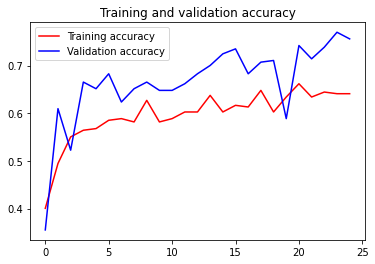

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [18]:
#Predict class of image

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=25)
  print(fn)
  print(classes)

Saving city_of_madison_electric_fire_truck_emergency_lights.jpeg to city_of_madison_electric_fire_truck_emergency_lights.jpeg
city_of_madison_electric_fire_truck_emergency_lights.jpeg
[[0. 1. 0.]]
